# Варинат 14
### 2/2,3
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 


#### Классификаторы

1. линейная регрессия без использования регуляризаторов;
2. линейная регрессия, LASSO регуляризатор;
3. линейная регрессия, RIDGE регуляризатор;


### Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.

1. dateCrawled: дата первого просмотра объявдения
2. name: имя машины
3. seller: продавец(частный или диллер)
4. offerType: вид продажи
5. price: цена
6. abtest: 
7. vihicleType: тип машины
8. yearOfRegistration: год регистрации
9. gearbox: коробка передач
10. powerPS: мощность машины в PS
11. model: модель
12. kilometer: пробег машины в километрах
13. monthOfRegistration: месяц регистрации
14. fuelType: тип топлива
15. notRepairedDamage: не отремонтированные повреждения
16. dateCreaed: дата создания
17. nrOfPictures: количество фотографий(содержит везде 0)
18. postalCode: индекс
19. lastSeenOnline: когда машину видели в сети последний раз

In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings("ignore")

In [2]:
autos = pd.read_csv('autos.csv', encoding = 'latin1')
autos.drop(['nrOfPictures'], axis=1, inplace=True)#Бесполезный столбец
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


### Удалите дубликаты строк в наборе данных. Приведите размер набора данных до и после данной операции

In [3]:
print("До удаления дубликатов: ", autos.shape)
autos.drop_duplicates(keep='first',inplace = True)
print("После удаления: ", autos.shape)

До удаления дубликатов:  (371528, 19)
После удаления:  (371524, 19)


### Выполните масштабирование количественных признаков. Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования

In [4]:
autos.drop(['name', 'dateCrawled', 'postalCode', 'lastSeen', 'dateCreated', 'model'],
          axis=1, inplace=True)
autos.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,privat,Angebot,480,test,NaN,1993,manuell,0,150000,0,benzin,volkswagen,NaN
1,privat,Angebot,18300,test,coupe,2011,manuell,190,125000,5,diesel,audi,ja
2,privat,Angebot,9800,test,suv,2004,automatik,163,125000,8,diesel,jeep,NaN
3,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein
4,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein


numerical:  ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']
categorial:  ['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


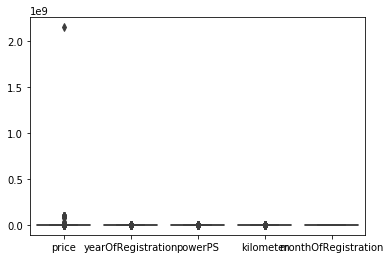

In [5]:
columns = autos.columns

#survived и pclass должны быть категориальными
numerical = [i for i in columns if autos[i].dtype.name != 'object']
categorical = [i for i in columns if autos[i].dtype.name == 'object']
print('numerical: ', numerical)
print('categorial: ', categorical)

sns.boxplot(data = autos[numerical])

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,privat,Angebot,2.235174e-07,test,NaN,0.110346,manuell,0.00000,1.000000,0.000000,benzin,volkswagen,NaN
1,privat,Angebot,8.521602e-06,test,coupe,0.112346,manuell,0.00950,0.827586,0.416667,diesel,audi,ja
2,privat,Angebot,4.563481e-06,test,suv,0.111568,automatik,0.00815,0.827586,0.666667,diesel,jeep,NaN
3,privat,Angebot,6.984919e-07,test,kleinwagen,0.111235,manuell,0.00375,1.000000,0.500000,benzin,volkswagen,nein
4,privat,Angebot,1.676381e-06,test,kleinwagen,0.112012,manuell,0.00345,0.586207,0.583333,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,privat,Angebot,1.024455e-06,test,NaN,0.111679,NaN,0.00000,0.103448,0.083333,NaN,sonstige_autos,NaN
371524,privat,Angebot,5.583279e-07,test,cabrio,0.111123,automatik,0.00505,0.827586,0.250000,benzin,smart,nein
371525,privat,Angebot,4.284084e-06,test,bus,0.110679,manuell,0.00510,1.000000,0.250000,diesel,volkswagen,nein
371526,privat,Angebot,1.583248e-06,test,kombi,0.111346,manuell,0.00500,1.000000,0.500000,diesel,volkswagen,NaN


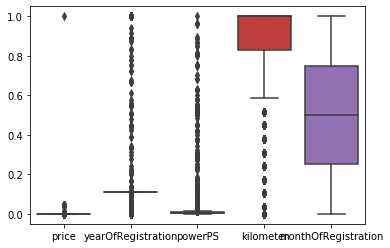

In [6]:
scaler = preprocessing.MinMaxScaler()

autos[numerical] = scaler.fit_transform(autos[numerical].values.astype(float))
sns.boxplot(data=autos[numerical])

autos

### Выполните замену категориальных признаков. Выберите и обоснуйте способ замены

In [7]:
#нужно разделить категориальные признаки на бинарные и небинарные
binary = [c for c in categorical if len(autos[c].unique()) == 2]
nonbinary = [c for c in categorical if len(autos[c].unique()) > 2]
print('Бинарные: ', binary)
print('Небинарные: ', nonbinary)

Бинарные:  ['seller', 'offerType', 'abtest']
Небинарные:  ['vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


In [8]:
autos = autos.dropna()
for i in categorical:
    print(i,': ', autos[i].unique())

seller :  ['privat' 'gewerblich']
offerType :  ['Angebot' 'Gesuch']
abtest :  ['test' 'control']
vehicleType :  ['coupe' 'kleinwagen' 'limousine' 'cabrio' 'kombi' 'suv' 'bus' 'andere']
gearbox :  ['manuell' 'automatik']
fuelType :  ['diesel' 'benzin' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
brand :  ['audi' 'volkswagen' 'skoda' 'bmw' 'peugeot' 'mazda' 'nissan' 'renault'
 'ford' 'mercedes_benz' 'seat' 'honda' 'fiat' 'mini' 'opel' 'smart'
 'alfa_romeo' 'subaru' 'mitsubishi' 'hyundai' 'volvo' 'lancia' 'porsche'
 'citroen' 'toyota' 'kia' 'chevrolet' 'dacia' 'suzuki' 'sonstige_autos'
 'daihatsu' 'chrysler' 'jaguar' 'rover' 'jeep' 'saab' 'daewoo'
 'land_rover' 'trabant' 'lada']
notRepairedDamage :  ['ja' 'nein']


In [15]:
#для бинарных признаков
for columns in [columns for columns in categorical if len(autos[columns].unique()) == 2]:
    for i, unic_item in enumerate(autos[columns].unique()):
        autos[columns] = autos[columns].replace(to_replace=[unic_item], value=[i])

In [18]:
autos.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,0,0,8.521602e-06,0,coupe,0.112346,0,0.00950,0.827586,0.416667,diesel,audi,0
3,0,0,6.984919e-07,0,kleinwagen,0.111235,0,0.00375,1.000000,0.500000,benzin,volkswagen,1
4,0,0,1.676381e-06,0,kleinwagen,0.112012,0,0.00345,0.586207,0.583333,diesel,skoda,1
5,0,0,3.026798e-07,0,limousine,0.110568,0,0.00510,1.000000,0.833333,benzin,bmw,0
6,0,0,1.024455e-06,0,cabrio,0.111568,0,0.00545,1.000000,0.666667,benzin,peugeot,1


In [19]:
#для небинарных
df_nonbinary = pd.get_dummies(autos[nonbinary])
#удалим старыые колонки
autos.drop(nonbinary, axis=1, inplace=True)
#добавим новые
autos = pd.concat([autos, df_nonbinary], axis=1)

autos.head()

,seller,offerType,price,abtest,yearOfRegistration,powerPS,kilometer,monthOfRegistration,gearbox,notRepairedDamage,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
1,0,0,8.521602e-06,0,0.112346,0.00950,0.827586,0.416667,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,6.984919e-07,0,0.111235,0.00375,1.000000,0.500000,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1.676381e-06,0,0.112012,0.00345,0.586207,0.583333,0,1,...,0,1,0,0,0,0,0,0,0,0
5,0,0,3.026798e-07,0,0.110568,0.00510,1.000000,0.833333,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1.024455e-06,0,0.111568,0.00545,1.000000,0.666667,0,1,...,0,0,0,0,0,0,0,0,0,0


### Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

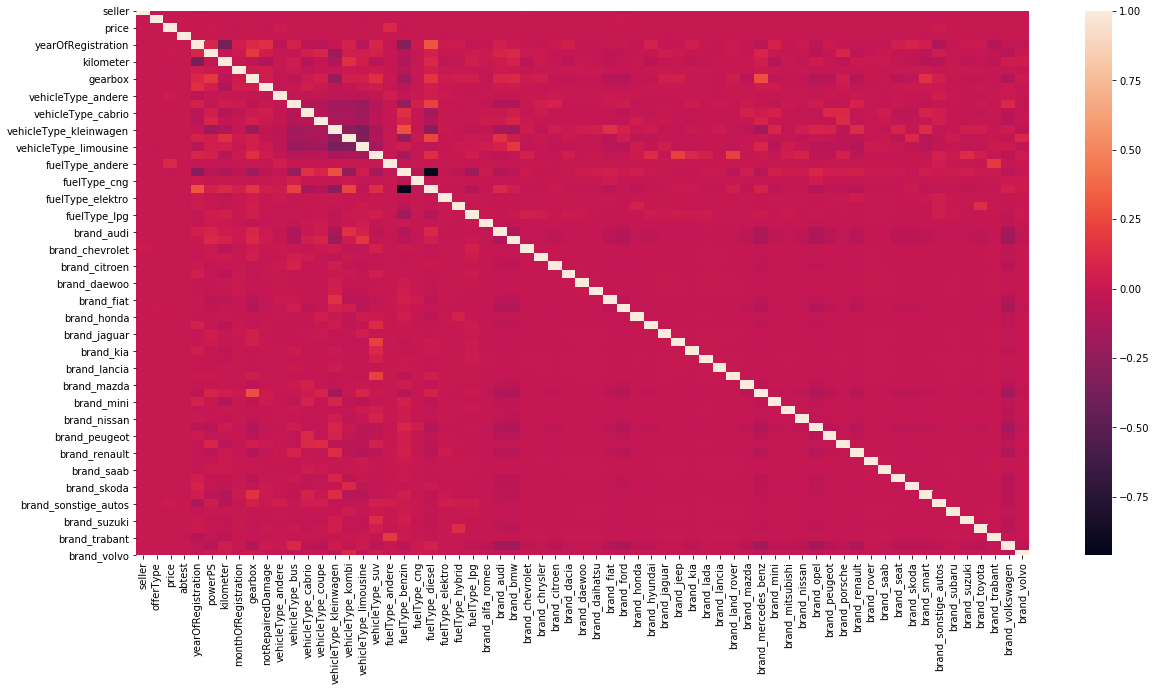

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(autos.corr())

### Заполните пропущенные значения в данных

In [25]:
autos = autos.fillna(autos.median(axis=0), axis=0)

### Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [36]:
X, y = autos.drop(['price'], axis=1), autos['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

params = {'alpha': np.arange(0, 4, 0.1)}

lasso = Lasso()

print(lasso.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [37]:
lasso_grid = GridSearchCV(lasso, params)
lasso_grid.fit(X_train, y_train)
best_alpha = lasso_grid.best_estimator_.alpha
print('Лучшее значение Альфа:', best_alpha)

Лучшее значение Альфа: 0.0


In [38]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train,y_train)
pred_las = lasso.predict(X_test)
P, p_value_P = pearsonr(pred_las, y_test)
print("Коррелция по Пирсону: ", P)
S, p_value_S = spearmanr(pred_las, y_test)
print("Корреляция по Спирмену: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
print(pred_las[:15] - y_test[:15])

Коррелция по Пирсону:  0.004765522142233164
Корреляция по Спирмену:  0.7445551283527948
P_VALUSE_P : 0.1766087616839623
P_VALUSE_S : 0.0
177550    1.848350e-06
8164      6.414397e-07
5300      4.269065e-07
199977    5.586835e-07
196815   -9.299750e-07
174651    7.373823e-06
45849    -7.160788e-07
203652    2.127882e-06
72317    -1.687553e-06
326486   -1.490959e-07
300497    2.256472e-06
183333    1.704335e-06
128759    6.050288e-07
12081    -2.966057e-07
75046    -1.006840e-06
Name: price, dtype: float64


In [41]:
ridge = Ridge()
params = {'alpha': np.arange(0, 4, 0.1)}
ridge_grid = GridSearchCV(ridge, params)
ridge_grid.fit(X_train, y_train)
best_alpha = ridge_grid.best_estimator_.alpha
print('Лучшее значение альфа:', best_alpha)

Лучшее значение альфа: 0.1


In [43]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
pred_rid = ridge.predict(X_test)
P, p_value_P = pearsonr(pred_rid, y_test)
print("Коррелция по Пирсону: ", P)
S, p_value_S = spearmanr(pred_rid, y_test)
print("Корреляция по Спирмену: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
print(pred_rid[:15] - y_test[:15])

Коррелция по Пирсону:  0.004468441451122153
Корреляция по Спирмену:  0.7217017470085723
P_VALUSE_P : 0.2051438155914174
P_VALUSE_S : 0.0
177550    1.699509e-06
8164      4.841207e-07
5300      2.728085e-07
199977    5.756119e-07
196815   -7.847303e-07
174651    7.470019e-06
45849    -5.906485e-07
203652    2.319097e-06
72317    -1.675308e-06
326486   -3.984765e-07
300497    2.637234e-06
183333    1.791690e-06
128759    5.531124e-07
12081    -2.231846e-07
75046    -1.023387e-06
Name: price, dtype: float64
